In [1]:
%pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install last version of Pandas:
%pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Require Pandas version >= 2.2.2
import pandas as pd
#pd.__version__
assert pd.__version__ >= '2.2.2', 'Please update Pandas to version 2.2.2 or newer'

In [4]:
import linearmodels
import pandas as pd, os, pyreadr
import warnings
import time
import numpy as  np
import pandas as pd
import random
import pandas as pd
import visualization as viz
import data_loading as dl
import risk_pricing as rp
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
print(pd.__version__)


2.2.2


In [5]:
#% PARAMETERS
source_folder_path = "/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src/"
modelname = "dicfullmc10thr10defnob5noa0_8_4t" #"dicfullmc10thr10defnob5noa0_8_4t"
quantiles = 4
clean_again = False
generate_plots = False
warnings.filterwarnings("ignore")
print_kurtosis = False
pfn = "pf36_name"
mo_window = 12*5
start_time = time.time()
# print the current working directory (for reference)
print("Current Working Directory:", os.getcwd())
os.chdir(source_folder_path)
print("New Working Directory:", os.getcwd())

Current Working Directory: /Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src
New Working Directory: /Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/src


Variables created:

- amazon_nov01_short:

- cequity_mapper:

- Fama-French factors: ff3fw, ff5fw, ff3fm, ff5fm

- Topic_map_unlabeled

- Stocks vectors: stoxmo_orig, stoxwe_orig

- comparison_measures: a vector that calculates the average industry skill and firm patent intensity for each of the topics.

In [6]:
# Creating the directory
base_path = "/Users/pedrovallocci/Documents/PhD (local)/Research/Github/KnowledgeKRisk_10Ks/text/"
dir_path = os.path.join(base_path, modelname)
os.makedirs(dir_path, exist_ok=True)

# Setting up the figure folder path
figfolder = os.path.join(dir_path, "")

# Loading the data from load_dataframes:
amazon_nov01_short, cequity_mapper, ff3fw, ff5fw, \
  ff3fm, ff5fm, topic_map_unlabeled, \
    stoxmo_orig, comparison_measures, \
      stoxwe_orig = dl.load_dataframes(modelname, \
    source_folder_path, start_time, clean_again)

Arruda é 45
Tempo de execução depois de carregar os dados: 0.6179020404815674


A glimpse of the column in stoxmo_orig.

In [7]:
stoxmo_orig

,PERMNO,date,COMNAM,CUSIP,PRC,VOL,RET,TICKER,SHRCD
0,10001.0,20000131.0,ENERGY WEST INC,36720410,8.12500,403.0,-0.044118,EWST,11.0
1,10001.0,20000229.0,ENERGY WEST INC,36720410,8.25000,222.0,0.015385,EWST,11.0
2,10001.0,20000331.0,ENERGY WEST INC,36720410,-8.00000,723.0,-0.015758,EWST,11.0
3,10001.0,20000428.0,ENERGY WEST INC,36720410,-8.09375,263.0,0.011719,EWST,11.0
4,10001.0,20000531.0,ENERGY WEST INC,36720410,-7.90625,221.0,-0.023166,EWST,11.0
...,...,...,...,...,...,...,...,...,...
1848816,93436.0,20200831.0,TESLA INC,88160R10,498.32001,4051970.0,0.741452,TSLA,11.0
1848817,93436.0,20200930.0,TESLA INC,88160R10,429.01001,17331954.0,-0.139087,TSLA,11.0
1848818,93436.0,20201030.0,TESLA INC,88160R10,388.04001,8330610.0,-0.095499,TSLA,11.0
1848819,93436.0,20201130.0,TESLA INC,88160R10,567.59998,7811501.0,0.462736,TSLA,11.0


Below, I need to use a trick when creating quartiles of topic_kk to avoid ties. That's not the ideal situation. Even better, I should not overwrite the original value of topic_kk with the new one.

In [8]:
# Pause execution of code and return to the command line:
#topic_map, labels = viz.label_dicfullmc10thr10defnob40noa1_4t(topic_map_unlabeled)
import visualization as viz
topic_map = viz.label_topic_map(topic_map_unlabeled, modelname)
# topic_dict = {"dicfullmc10thr10defnob40noa1_4t": {"topic_0": "topic_kk", "topic_1": "topic_finl", "topic_2": "topic_sw", "topic_3": "topic_rawm"},
#                 "dicfullmc10thr10defnob40noa0_8_4t": {"topic_0": "topic_0", "topic_1": "topic_1", "topic_2": "topic_2", "topic_3": "topic_kk"},
#                 "dicfullmc10thr10defnob5noa1_4t": {"topic_0": "topic_0", "topic_1": "topic_1", "topic_2": "topic_2", "topic_3": "topic_kk"},
#                 "dicfullmc10thr10defnob5noa0_8_4t": {"topic_0": "topic_0", "topic_1": "topic_1", "topic_2": "topic_2", "topic_3": "topic_kk"},
#                 "dicfullmc10thr10defnob40noa0_9_4t": {"topic_0": "topic_0", "topic_1": "topic_1", "topic_2": "topic_2", "topic_3": "topic_kk"}}   

# topic_map_labeled = topic_map_unlabeled.copy()

# topic_map_labeled.rename(columns = topic_dict[modelname], inplace=True)  
# topic_map = topic_map_labeled  
print("Running time:", time.time() - start_time)

#topic_kk = labels[0]

# Add a random number from a uniform distribution from 0 to 1e-6 to avoid ties:
topic_map['topic_kk_no_ties'] = topic_map['topic_kk'] # +  np.random.uniform(0, 1e-6, len(topic_map['topic_kk']))
topic_map['ntile_topic_kk'] = (topic_map.
    groupby('year')['topic_kk_no_ties'].
    transform(lambda x: pd.qcut(x, [0, 0.40, 0.60, 0.80,  1], labels=False, duplicates='raise')))

Running time: 0.6443939208984375


Text(0, 0.5, 'Frequency')

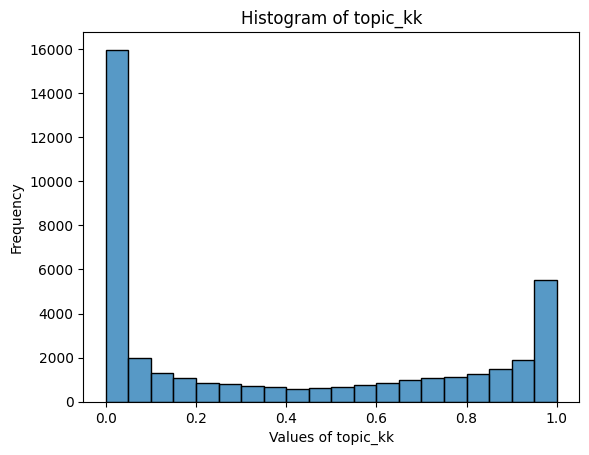

In [9]:
# Create a histogram of the topic_kk variable in Seaborn:
import seaborn as sns
import matplotlib.pyplot as plt
# Create new figure: 
sns.histplot(data=topic_map, x='topic_kk', bins=20, kde=False)  # Adjust bins as needed
plt.title('Histogram of topic_kk')
plt.xlabel('Values of topic_kk')
plt.ylabel('Frequency')

In [10]:
if generate_plots:
    topic_map = viz.generate_plots(topic_map, figfolder, start_time, quantiles)
    
print("Running time:", time.time() - start_time)
stoxmo = dl.clean_stoxmo_ff5(stoxmo_orig, cequity_mapper, topic_map, ff5fm)  # Assuming this is already converted to Python
stoxmo_with_pfs = rp.attribute_portfolios_mo(stoxmo)  # Adjusted the function name to Python convention

Running time: 0.848945140838623


In [12]:
import risk_pricing as rp
fmb, indexed_df = rp.famaMacBethFull(stoxwe_orig, cequity_mapper, topic_map, ff5fw, "pf36_name", window_size = 104)
fmb

Dep. Variable:,eretw,R-squared:,0.0033
Estimator:,FamaMacBeth,R-squared (Between):,0.8549
No. Observations:,23544,R-squared (Within):,0.0005
Date:,"Sat, Apr 20 2024",R-squared (Overall):,0.0033
Time:,15:00:32,Log-likelihood,4.343e+04
Cov. Estimator:,Fama-MacBeth Standard Cov,,
,,F-statistic:,13.105
Entities:,36,P-value,0.0000
Avg Obs:,654.00,Distribution:,"F(6,23538)"
Min Obs:,654.00,,
Max Obs:,654.00,F-statistic (robust):,4.2851


In [20]:
from statsmodels.regression.rolling import RollingOLS
from statsmodels.api import add_constant
from linearmodels.panel.model import FamaMacBeth

eret_we2 = add_constant(eret_we, prepend=False)
eret_we2.set_index('yw', inplace=True)
eret_we2.rename(columns={'const': 'alpha', 'Mkt.RF': 'MktRF'}, inplace=True)
# mod = RollingOLS.from_formula('eretw ~ MktRF + SMB + HML + kkrhml', data=eret_we2, window=52, expanding=True, subset=eret_we2.pf36_name == 11)
# rres = mod.fit()
# rres.params
results_list = []

# Iterate over each unique value of pf36_name
for pf_name in eret_we2['pf36_name'].unique():
    # Subset the DataFrame for the current pf36_name
    subset_data = eret_we2[eret_we2['pf36_name'] == pf_name]
    
    # Initialize and fit the RollingOLS model
    mod = RollingOLS.from_formula('eretw ~ MktRF + SMB + HML + kkrhml', data=subset_data, window=52, expanding=False)
    rres = mod.fit(cov_type="HC0", method="pinv", params_only=True)
    
    # Assuming your DataFrame's index contains the time window identifier 'yw'
    # Extract coefficients for each window and create a DataFrame
    for idx, params in rres.params.iterrows():
        results_list.append([idx, pf_name, params['Intercept'], params['MktRF'], params['SMB'], params['HML'], params['kkrhml']])

# Convert the list of results into a DataFrame
results_df = pd.DataFrame(results_list, columns=['yw', 'pf36_name', 'Intercept', 'MktRF', 'SMB', 'HML', 'kkrhml'])
results_df = results_df.merge(eret_we[['yw', 'pf36_name', 'eretw']], on=['yw', 'pf36_name'], how='left')

indexed_df = results_df.set_index(['pf36_name', 'yw'], inplace=False)
dog = FamaMacBeth.from_formula('eretw ~ MktRF + SMB + HML + kkrhml', indexed_df).fit()
dog.summary

NameError: name 'eret_we' is not defined

In [21]:
def regress_and_summarize(group):
    model = smf.ols(formula, data=group).fit(cov_type= "HAC", cov_kwds={'maxlags': 4})
    # Breusch-Pagan test:
    #test_result = statsmodels.stats.api.het_breuschpagan(model.resid, model.model.exog)
    #print(statsmodels.compat.lzip(['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'], test_result))
    return pd.Series({
        'eretw': group['eretw'].mean(),
        't': len(group),
        '(Intercept)': model.params['Intercept'],
        'kkrhml': model.params['kkrhml'],
        'HML': model.params['HML'],
        'SMB': model.params['SMB'],
        'CMA': model.params.get('CMA', np.nan),
        'RMW': model.params.get('RMW', np.nan),
        'MktRF': model.params['MktRF'],
        'sigmae': len(group) * model.bse['Intercept']**2
    })

# Assuming `eret_we` is your DataFrame and `formula` is a string representing your regression formula
# Replace `pfn` with the actual column name you intend to use
formula = 'eretw ~ kkrhml + HML + SMB + MktRF'
eret_we = eret_we.rename(columns={'Mkt.RF': 'MktRF'})
pfn = "pf36_name"
print("Deu tudo certo até aqui")

first_stage1 = eret_we.groupby(pfn).apply(regress_and_summarize).reset_index()

# Getting sigmae for intercept
get_sigmae = (first_stage1[['sigmae', pfn]]
              .dropna())
first_stage2 = first_stage1

X = first_stage2[['kkrhml', 'HML', 'SMB', 'MktRF']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = first_stage2['eretw']

# Define the weights
weights = first_stage2['sigmae']

# Fit the weighted least squares model
#model_wls = statsmodels.regression.linear_model.WLS(y, X).fit()
model_wls = statsmodels.regression.linear_model.WLS(y, X).fit()
#model_wls = statsmodels.regression.linear_model.GLS(y, X, sigma= ).fit()

# Print the summary of the model
print(model_wls.summary())

NameError: name 'eret_we' is not defined

In [ ]:
from linearmodels import FamaMacBeth
from linearmodels.panel import generate_panel_data
panel_data = generate_panel_data()
dog = panel_data.data
mod = FamaMacBeth.from_formula("y ~ 1 + x1", panel_data.data)
res = mod.fit()


In [ ]:
from linearmodels.panel.model import FamaMacBeth
eret_we['yw_date'] = pd.to_datetime(eret_we['yw']*10+1, format="%G%V%u")

panel_data = (eret_we.
            set_index(['pf36_name', 'yw_date']))
mod = FamaMacBeth.from_formula('eretw ~ kkrhml + HML + SMB + MktRF', panel_data, check_rank=False)
res = mod.fit()

ValueError: Model cannot be estimated. All blocks of time-series observations are rank deficient, and so it is not possible to estimate anycross-sectional regressions.

In [ ]:
data = sm.datasets.longley.load()
data.exog = sm.add_constant(data.exog)
ols_resid = sm.OLS(data.endog, data.exog).fit().resid
#res_fit = sm.OLS(ols_resid[1:], ols_resid[:-1]).fit()

ols_resid[:-1]
ols_resid[1:]

1     -94.013942
2      46.287168
3    -410.114622
4     309.714591
5    -249.311215
6    -164.048956
7     -13.180357
8      14.304773
9     455.394095
10    -17.268927
11    -39.055043
12   -155.549974
13    -85.671308
14    341.931514
15   -206.757825
dtype: float64

In [ ]:
formula = 'eretw ~ kkrhml + HML + SMB + Mkt.RF'
grouped = eret_we.groupby(pfn)
results = []
for name, group in grouped:
    model = smf.ols(formula, data=group).fit()
    summary = model.summary2().tables[1]
    summary['group'] = name
    summary['eretw_mean'] = group['eretw'].mean()
    summary['t'] = len(group)
    results.append(summary.reset_index())

first_stage1 = pd.concat(results)

# Calculate sigma_e
get_sigmae = first_stage1[first_stage1['index'] == 'Intercept'].copy()
get_sigmae['sigmae'] = get_sigmae['t'] * get_sigmae['Std.Err.']**2
get_sigmae = get_sigmae[[pfn, 'sigmae']].dropna()

# Prepare final dataframe
first_stage1 = first_stage1.pivot(index='group', columns='index', values='Coef.').reset_index()
first_stage1.rename(columns={'group': pfn}, inplace=True)
first_stage2 = pd.merge(first_stage1, get_sigmae, on=pfn, how='left').dropna()

PatsyError: Error evaluating factor: NameError: name 'Mkt' is not defined
    eretw ~ kkrhml + HML + SMB + Mkt.RF
                                 ^^^^^^

In [ ]:
# Calculate portfolio returns
pf_ret = (stoxmo_with_pfs.dropna(subset=['eretm', 'me'])
          .groupby(['ym', pfn])
          .agg(eret=('eretm', lambda x: np.average(x, weights=stoxmo_with_pfs.loc[x.index, 'me'])),
                Mkt_RF=('Mkt-RF', 'mean'),
                SMB=('SMB', 'mean'),
                HML=('HML', 'mean'),
                RMW=('RMW', 'mean'),
                CMA=('CMA', 'mean'),
                RF=('RF', 'mean'))
          .reset_index())

# Calculate kkrhml returns
def calc_returns(group):
    weights = group['me']
    return np.nansum(group['eretm'] * weights) / np.sum(weights)

kkrhml_ret = (stoxmo_with_pfs
              .dropna(subset=['topic_kk'])
              .groupby(['ym', 'ntile_topic_kk'])
              .apply(calc_returns)
              .unstack(level='ntile_topic_kk')
              .rename(columns=lambda x: f'kk{x}')
              .assign(kkrhml=lambda x: x['kk4'] - x['kk1'])
              .reset_index()[['ym', 'kkrhml']])

# Assume kkpt_ntile calculation is similar to kkrhml_ret
# This section would be adjusted based on actual logic for kkpt_ntile

# Join and finalize eret_mo dataframe
eret_mo = pf_ret.merge(kkrhml_ret, on='ym', how='inner')  # Assuming kkpthml_ret joins similarly
eret_mo = eret_mo.rename(columns={'eret': 'eretm'}).dropna().reset_index(drop=True)
    
#eret_mo, stoxmo_with_pfs = rp.create_eret_mo_panel_ff5(stoxmo_orig, cequity_mapper, topic_map, ff5fm, pfn)


In [ ]:
eret_we, stoxwe_with_pfs = rp.create_eret_we_panel_ff5(stoxwe_orig, cequity_mapper, topic_map, pfn)
first_stage_rollwin_mo, second_stage_rollwin_mo = rp.fama_macbeth(mo_window, pfn)

first_stage2 = rp.first_stage(first_stage_rollwin_mo, pfn)

rp.run_regression_models(first_stage2)

viz.plot_returns()

viz.descriptive_statistics(topic_map, figfolder)

viz.amazon_graph(amazon_nov01_short, figfolder)

viz.filecounter(figfolder)

viz.stargaze_comparison(comparison_measures, figfolder)


if print_kurtosis:
  viz.plot_kurtosis(stoxda_orig, cequity_mapper, topic_map)